In [12]:
import pandas as pd
from PIL import Image
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#path to traditional-decor-patterns direcotry
# enter path as in example: decor_path='foo/foo2/bar/traditional-decor-patterns'
decor_path= ''

In [4]:
df = pd.read_csv(decor_path+"/decor.csv")

In [8]:
df.head()

,country_label,country,decor_label,decor,type_label,type,file
33,1,Russia,1,Gzhel,2,product,01_01_2_001.png
34,1,Russia,1,Gzhel,2,product,01_01_2_002.png
35,1,Russia,1,Gzhel,2,product,01_01_2_003.png
36,1,Russia,1,Gzhel,2,product,01_01_2_004.png
37,1,Russia,1,Gzhel,2,product,01_01_2_005.png


In [5]:
print("entries type: "+" , ".join(str(x) for x in df.type.unique()))

entries type: pattern , product


In [6]:
#deleting pattern type from data frame, as said in exercise clasificator must contain only products
df = df[df['type'] == 'product']

In [15]:
df.shape

(285, 7)

In [10]:
"Decor categories: "+" , ".join(str(x) for x in df.decor.unique())

'Decor categories: Gzhel , Khokhloma , Gorodets , Wycinanki łowickie , Wzory kaszubskie , Iznik , Neglyubka'

In [11]:
"Country categories: "+" , ".join(str(x) for x in df.country.unique())

'Country categories: Russia , Poland , Turkey , Belarus'

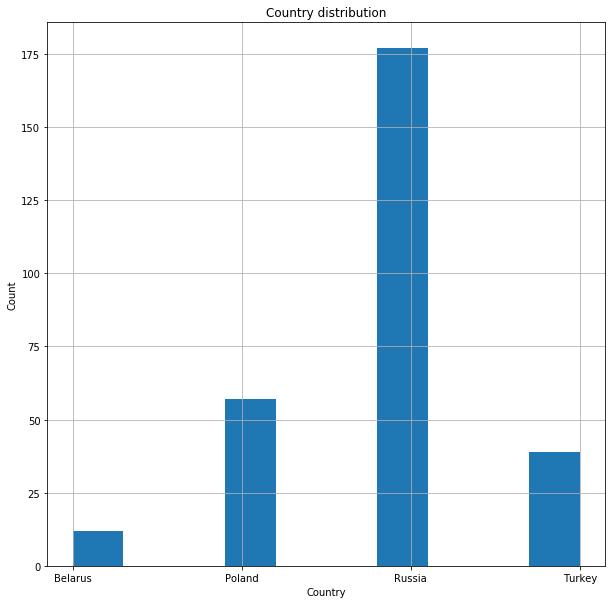

In [13]:
plt.figure(figsize=(10,10))
plt.hist(df.country)
plt.title("Country distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
#as seen in histogram above, categories in country categorisation
#are highly imbalanced

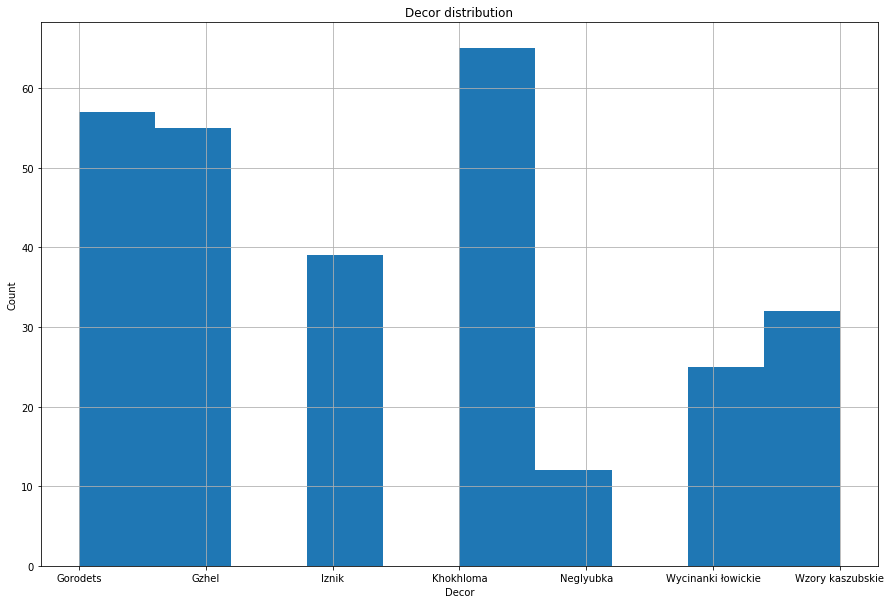

In [18]:
plt.figure(figsize=(15,10))
plt.hist(df.decor)
plt.title("Decor distribution")
plt.xlabel("Decor")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
#decor categories look better the country, but "Neglyubka" class 
#have only little above 10 images

In [ ]:
#create directories for each category
main_dir='country'
if not os.path.exists(main_dir):
    os.makedirs(main_dir)
for directory in set(df.country):
    if not os.path.exists(main_dir+'/'+directory):
        os.makedirs(main_dir+'/'+directory)

main_dir='decor'
if not os.path.exists('decor'):
    os.makedirs('decor')
for directory in set(df.decor):
    if not os.path.exists(main_dir+'/'+directory):
        os.makedirs(main_dir+'/'+directory)

In [ ]:
#create directories for jpeg images
if not os.path.exists('jpegs'):
    os.makedirs('jpegs')

In [ ]:
#paths do image direcotires, png and jpegs
png_path = decor_path+'/decor'
jpeg_path= 'jpegs'

In [ ]:
#converting .png to .jpg for retrain.py
for i in range(len(df)):
    im = Image.open(png_path+'/'+df.iloc[i].file)
    im = im.convert("RGB")
    im.save(jpeg_path+'/'+df.iloc[i].file+'.jpg', 'JPEG')

In [ ]:
#copy images to respective category directories
for i in range(len(df)):
    shutil.copy2('jpegs/'+df.iloc[i].file+'.jpg', 'country/'+df.iloc[i].country)
    shutil.copy2('jpegs/'+df.iloc[i].file+'.jpg', 'decor/'+df.iloc[i].decor)